In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/Airbnb_Texas_Rentals.csv', index_col=0)

<b> Data characteristics </b>

In [3]:
data.shape

(18259, 9)

In [4]:
data.dtypes

average_rate_per_night     object
bedrooms_count             object
city                       object
date_of_listing            object
description                object
latitude                  float64
longitude                 float64
title                      object
url                        object
dtype: object

In [5]:
data.describe()

,latitude,longitude
count,18225.000000,18225.000000
mean,30.684906,-97.076785
std,1.671008,1.328314
min,25.894075,-103.690925
25%,29.693117,-97.817193
50%,30.275907,-97.134467
75%,32.671095,-96.307023
max,35.256299,-93.771139


In [8]:
print('Unique values count for each column: ')
{i:data[i].nunique() for i in data}

Unique values count for each column: 


{'average_rate_per_night': 700,
 'bedrooms_count': 13,
 'city': 505,
 'date_of_listing': 102,
 'description': 11076,
 'latitude': 11516,
 'longitude': 11516,
 'title': 11398,
 'url': 18259}

In [9]:
print('Duplicated values count for each column: ')

{i:data[i].duplicated().sum() for i in data}

Duplicated values count for each column: 


{'average_rate_per_night': 17558,
 'bedrooms_count': 18245,
 'city': 17754,
 'date_of_listing': 18157,
 'description': 7182,
 'latitude': 6742,
 'longitude': 6742,
 'title': 6860,
 'url': 0}

In [27]:
print('Nan values count for each column: ')

{i:data[i].isna().sum() for i in data}

Nan values count for each column: 


{'average_rate_per_night': 28,
 'bedrooms_count': 3,
 'city': 0,
 'date_of_listing': 0,
 'description': 2,
 'latitude': 34,
 'longitude': 34,
 'title': 3,
 'url': 0}

<b> Columns preprocessing </b>

In [28]:
data['average_rate_per_night'][~(data['average_rate_per_night'].str.startswith('$').astype('bool').values)]

Series([], Name: average_rate_per_night, dtype: object)

In [39]:
data['average_rate_per_night_dollar'] = data['average_rate_per_night'].apply(lambda row: None if pd.isna(row) else row[1:]).values
data['average_rate_per_night_dollar'] = data['average_rate_per_night_dollar'].astype('float64')

In [50]:
(data.bedrooms_count=='0').sum()

0

In [49]:
data.bedrooms_count[~(data.bedrooms_count.str.contains('\\d', regex=True).astype('bool'))]

10       Studio
25       Studio
33       Studio
89       Studio
109      Studio
          ...  
18155    Studio
18165    Studio
18178    Studio
18197    Studio
18225    Studio
Name: bedrooms_count, Length: 1026, dtype: object

In [52]:
data['bedrooms_count_int'] = data['bedrooms_count'].replace('Studio', '0').astype('float64')

In [54]:
data['city_chng'] = data['city'].str.lower().str.strip().values

In [56]:
data['date_of_listing'].values

array(['May 2016', 'November 2010', 'January 2017', ..., 'December 2016',
       'October 2016', 'July 2015'], dtype=object)

In [71]:
data['month'] = data['date_of_listing'].apply(lambda row: row.split(' ')[0]).astype(str).values
data['year'] = data['date_of_listing'].apply(lambda row: row.split(' ')[1]).astype(int).values

In [73]:
data['latitude'] = data['latitude'].astype('float64')
data['longitude'] = data['longitude'].astype('float64')

<b> Data EDA plots</b>

In [80]:
data.average_rate_per_night_dollar.describe()

count    18231.000000
mean       211.539740
std        415.569334
min         10.000000
25%         59.000000
50%        109.000000
75%        212.000000
max      10000.000000
Name: average_rate_per_night_dollar, dtype: float64

In [99]:
import numpy as np
quants = np.quantile(data.average_rate_per_night_dollar.fillna(0), np.linspace(0, 0.9, 9))

In [100]:
quants

array([  0.,  40.,  54.,  75.,  97., 125., 169., 250., 402.])

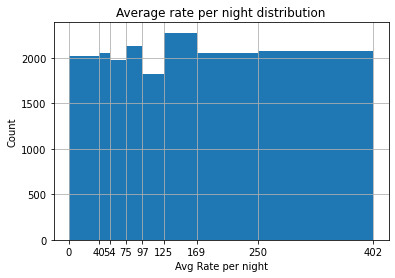

In [103]:
data.average_rate_per_night_dollar.hist(bins=quants)
plt.xticks(quants)
plt.title('Average rate per night distribution')
plt.xlabel('Avg Rate per night')
plt.ylabel('Count')
plt.show()

In [117]:
data.bedrooms_count_int.unique()

array([ 2.,  4.,  1.,  3.,  0.,  7.,  5.,  8.,  6.,  9., 11., nan, 13.,
       10.])

In [118]:
cnts.values()

dict_values([3302, 1238, 9394, 2732, 1026, 36, 410, 22, 76, 5, 1, 1, 1, 13, 1, 1])

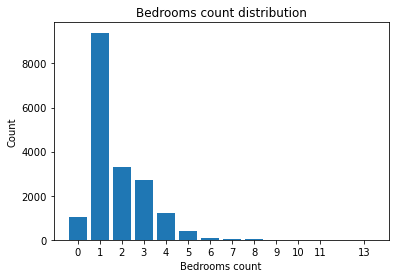

In [122]:
from collections import Counter
cnts = Counter(data.bedrooms_count_int)
plt.bar(cnts.keys(), cnts.values())
plt.xticks(data.bedrooms_count_int.fillna(0).unique())
plt.xlabel('Bedrooms count')
plt.ylabel('Count')
plt.title('Bedrooms count distribution')
plt.show()

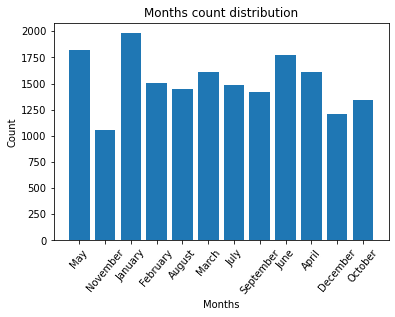

In [128]:
from collections import Counter
cnts = Counter(data.month)
plt.bar(cnts.keys(), cnts.values())
plt.xticks(data.month.unique(), rotation='50')
plt.xlabel('Months')
plt.ylabel('Count')
plt.title('Months count distribution')
plt.show()

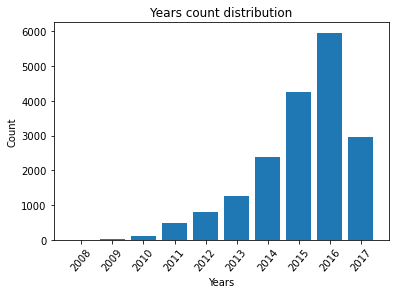

In [129]:
from collections import Counter
cnts = Counter(data.year)
plt.bar(cnts.keys(), cnts.values())
plt.xticks(data.year.unique(), rotation='50')
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('Years count distribution')
plt.show()